
📁 Αρχείο: airplane.jpg
🎛️ Πλήθος μοναδικών τιμών: 220
📦 Μέγεθος αρχικού (bits): 2097152
📉 Μέγεθος συμπιεσμένου (bits): 1787841
⚖️ Λόγος συμπίεσης: 1.17x


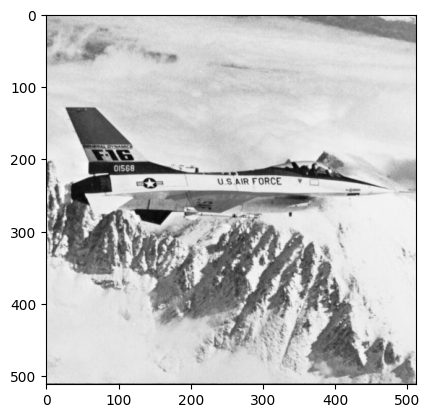

In [1]:
from collections import defaultdict
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import heapq
# ===== 1. Υπολογισμός Συχνοτήτων =====
def calculate_frequencies(image):
    freq = defaultdict(int)
    for pixel in image.flatten():
        freq[pixel] += 1
    total = image.size
    prob = {k: v / total for k, v in freq.items()}
    return dict(sorted(prob.items(), key=lambda item: item[1], reverse=True))

# ===== 2. Αναδρομική Συνάρτηση Shannon-Fano =====
def shannon_fano(symbols_probs):
    def build(symbols):
        if len(symbols) == 1:
            return {symbols[0][0]: ''}
        total = sum(p for _, p in symbols)
        acc = 0
        for i in range(len(symbols)):
            acc += symbols[i][1]
            if acc >= total / 2:
                break
        left = symbols[:i+1]
        right = symbols[i+1:]
        left_codes = build(left)
        right_codes = build(right)
        for k in left_codes:
            left_codes[k] = '0' + left_codes[k]
        for k in right_codes:
            right_codes[k] = '1' + right_codes[k]
        return {**left_codes, **right_codes}

    symbols = list(symbols_probs.items())
    return build(symbols)

# ===== 3. Κωδικοποίηση Εικόνας =====
def encode_image(image, codebook):
    encoded = ''.join(codebook[pixel] for pixel in image.flatten())
    return encoded

# ===== 4. Μέγεθος και Συμπίεση =====
def compute_compression(original_image, encoded_str):
    original_bits = original_image.size * 8  # 8 bits ανά pixel
    compressed_bits = len(encoded_str)
    compression_ratio = original_bits / compressed_bits
    return original_bits, compressed_bits, compression_ratio

# ===== 5. Εκτέλεση σε αρχείο =====
def process_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    freqs = calculate_frequencies(img)
    codebook = shannon_fano(freqs)

    encoded = encode_image(img, codebook)
    original_bits, compressed_bits, ratio = compute_compression(img, encoded)

    print(f"\n📁 Αρχείο: {path}")
    print(f"🎛️ Πλήθος μοναδικών τιμών: {len(freqs)}")
    print(f"📦 Μέγεθος αρχικού (bits): {original_bits}")
    print(f"📉 Μέγεθος συμπιεσμένου (bits): {compressed_bits}")
    print(f"⚖️ Λόγος συμπίεσης: {ratio:.2f}x")

    return codebook, encoded



img = cv2.imread("airplane.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_np = np.array(img)

process_image("airplane.jpg")

plt.imshow(gray_img, cmap="gray")
plt.show()